## Observations and Insights 

In [26]:
#kcharlesr

#There is a strong positive correlation between average tumor volume and the weight of mice at 0.84.

#Despite having a non significant number more of trials, both Capomulin & Ramicane regiments had much 
#smaller on average tumor size.

#After reviewing the standard deviation and sem from the summary table of tumor volumes and also the box plot
#both Capomulin & Ramicane had more consistent results as well.




# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
single_dataset = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
single_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice.
single_dataset.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = single_dataset.loc[single_dataset.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
optional = single_dataset[single_dataset['Mouse ID'] == 'g989']
optional

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = single_dataset[single_dataset['Mouse ID'].isin(duplicate_id) == False]

In [31]:
# Checking the number of mice in the clean DataFrame.
#clean_df
clean_df.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary = pd.DataFrame(single_dataset.groupby("Drug Regimen").count())
summary
summary["Mean"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary["Median"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary["Variance"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary["Standard Deviation"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary["SEM"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary_table = summary[['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']]

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

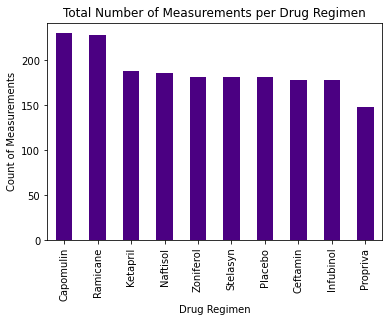

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number_measurements = clean_df['Drug Regimen'].value_counts()
y_axis = number_measurements.values
x_axis = number_measurements.index
number_measurements.plot(kind = 'bar', color = 'indigo')
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Measurements')
plt.title('Total Number of Measurements per Drug Regimen')
plt.show()

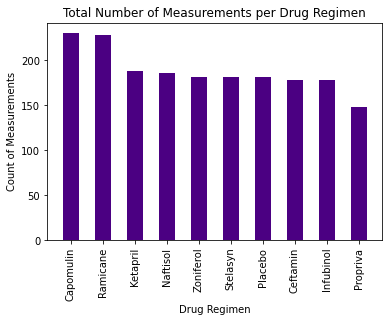

In [35]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
number_measurements = clean_df['Drug Regimen'].value_counts()
y_axis = number_measurements.values
x_axis = number_measurements.index
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Measurements')
plt.title('Total Number of Measurements per Drug Regimen')
plt.xticks(rotation = 90)
plt.bar(x_axis, y_axis, color = 'indigo', width = .5)
plt.show()

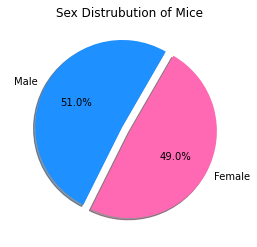

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_dist = clean_df['Sex'].value_counts()
#sex_dist
labels = ['Male', 'Female']
sizes = sex_dist.values
colors = ['dodgerblue', 'hotpink']
explode = [0.1, 0]
sex_dist.plot(kind = 'pie', explode = explode, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 60)
plt.title('Sex Distrubution of Mice')
plt.ylabel(' ')
plt.show()

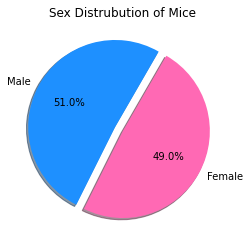

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist = clean_df['Sex'].value_counts()
#sex_dist
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 60)
plt.title('Sex Distrubution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tp = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint':'Last Timepoint'})
merge_df = pd.merge(clean_df, last_tp, on = 'Mouse ID')
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

    
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []
    
for drug in drugs:
    init_vol = merge_df.loc[merge_df['Drug Regimen'] == drug]
    tum_vol = init_vol.loc[init_vol['Timepoint'] == init_vol['Last Timepoint']]
    values = tum_vol['Tumor Volume (mm3)']
    tumor_vol_data.append(values)
    
    quartiles = values.quantile([.25, .5, .75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    print(f'The IQR for {drug} is {iqr}')
    
    lower_bnd = lower_q - (1.5 * iqr)
    upper_bnd = upper_q + (1.5 * iqr)
    print(f'The Lower Bound for {drug} is {lower_bnd}')
    print(f'The Upper Bound for {drug} is {upper_bnd}')
    
    outliers = (values.loc[(tum_vol['Tumor Volume (mm3)'] >= upper_bnd) | (tum_vol['Tumor Volume (mm3)'] <= lower_bnd)]).count()
    print(f'Number of outliers for {drug} {outliers}')
    print("-" * 30)

The IQR for Capomulin is 7.781863460000004
The Lower Bound for Capomulin is 20.70456164999999
The Upper Bound for Capomulin is 51.83201549
Number of outliers for Capomulin 0
------------------------------
The IQR for Ramicane is 9.098536719999998
The Lower Bound for Ramicane is 17.912664470000003
The Upper Bound for Ramicane is 54.30681135
Number of outliers for Ramicane 0
------------------------------
The IQR for Infubinol is 11.477135160000003
The Lower Bound for Infubinol is 36.83290494999999
The Upper Bound for Infubinol is 82.74144559000001
Number of outliers for Infubinol 1
------------------------------
The IQR for Ceftamin is 15.577752179999997
The Lower Bound for Ceftamin is 25.355449580000002
The Upper Bound for Ceftamin is 87.66645829999999
Number of outliers for Ceftamin 0
------------------------------


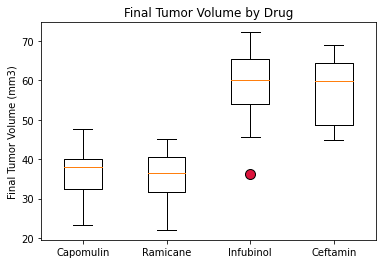

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_plt = dict(markerfacecolor = 'crimson', markersize = 10)
plt.boxplot(tumor_vol_data, flierprops = outlier_plt)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

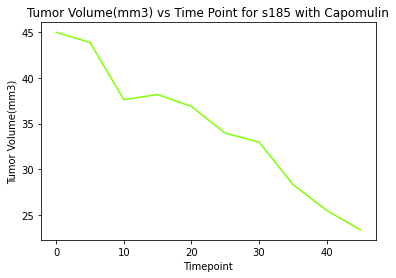

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen']  == 'Capomulin']
mouse_a = clean_df.loc[clean_df['Mouse ID'] == 's185']
plt.plot(mouse_a['Timepoint'], mouse_a['Tumor Volume (mm3)'], color = 'chartreuse' )
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Tumor Volume(mm3) vs Time Point for s185 with Capomulin')
plt.show()

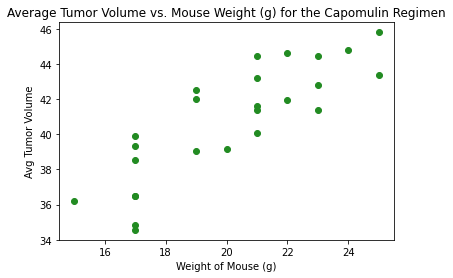

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight, tumor_volume, color = 'forestgreen')
plt.xlabel('Weight of Mouse (g)')
plt.ylabel('Avg Tumor Volume')
plt.title('Average Tumor Volume vs. Mouse Weight (g) for the Capomulin Regimen')
plt.show()

## Correlation and Regression

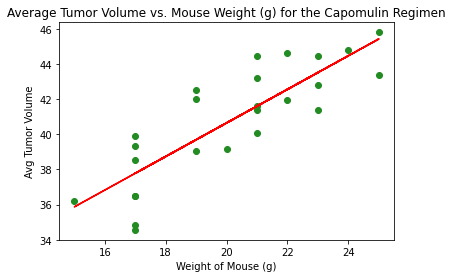

The correlation coefficient is 0.84
The equation for the linear regression is y = 0.95x + 21.55


In [49]:
# Calculate the correlation coefficient and linear regression model
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)

# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

#slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, tumor_volume)
line = slope * mouse_weight + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}' 
plt.plot(mouse_weight, line, 'r-')
plt.scatter(mouse_weight, tumor_volume, color = 'forestgreen')
plt.xlabel('Weight of Mouse (g)')
plt.ylabel('Avg Tumor Volume')
plt.title('Average Tumor Volume vs. Mouse Weight (g) for the Capomulin Regimen')
plt.show()
print(f'The correlation coefficient is {corr}')
print(f'The equation for the linear regression is {line_eq}')